Mini-Project: Sales Data Analysis and Visualization
Objective: Analyze sales data for a company and visualize trends.

Load a CSV file containing columns like Date, Product, Region, and Sales.
Handle missing values and remove any duplicate entries.
Calculate statistics like total sales, average sales, and sales variance.
Extract sales data for a specific product and region for further analysis. o Create a bar chart showing total sales per product. o Create a line chart showing sales trends over time. o Create a pie chart showing sales distribution across regions.
Save cleaned data and visualizations as separate files for reporting.

Total Sales: 1451.4285714285716
Average Sales: 181.42857142857144
Sales Variance: 3897.9591836734694
Extracted Data for Product A in North:
         Date    Product Region  Sales
0  01-11-2024  Product A  North  100.0
2  03-11-2024  Product A  North  150.0
5  06-11-2024  Product A  North  120.0


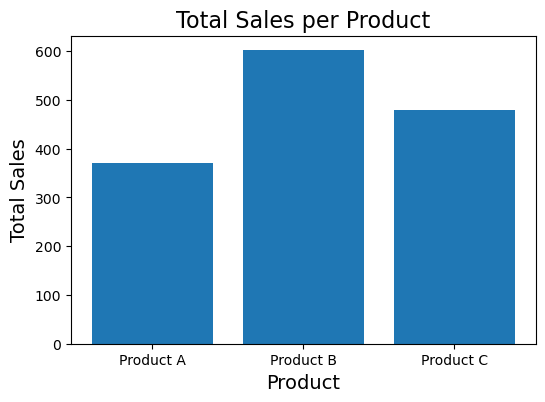

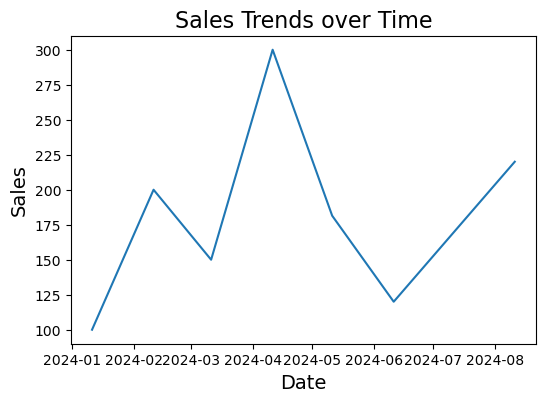

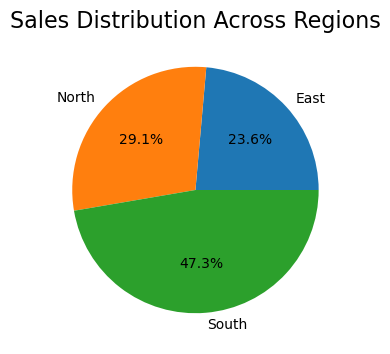

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def creat_data(data): 
    df = pd.DataFrame(data)
    df.to_csv('sales_data.csv', index=False)
    return df


def load_data(file_name):
    try:
        data = pd.read_csv(file_name)
        return data
    except FileNotFoundError:
        print("File not found.")
        return None

def clean_data(data):
    data.drop_duplicates(inplace=True)
    data['Sales'] = data['Sales'].fillna(data['Sales'].mean())
    return data

def calculate_statistics(data):
    total_sales = data['Sales'].sum()
    average_sales = data['Sales'].mean()
    sales_variance = data['Sales'].var()
    return total_sales, average_sales, sales_variance

def extract_data(data, product, region):
    extracted_data = data[(data['Product'] == product) & (data['Region'] == region)]
    return extracted_data

def create_visualizations(data):
    product_sales = data.groupby('Product')['Sales'].sum()
    plt.figure(figsize=(6, 4))
    plt.bar(product_sales.index, product_sales.values)
    plt.title('Total Sales per Product',fontsize = 16)
    plt.xlabel('Product',fontsize = 14)
    plt.ylabel('Total Sales',fontsize = 14)
    plt.savefig('product_sales_bar_chart.png')

    data['Date'] = pd.to_datetime(data['Date'])
    data.sort_values(by='Date', inplace=True)
    plt.figure(figsize=(6, 4))
    plt.plot(data['Date'], data['Sales'])
    plt.title('Sales Trends over Time',fontsize = 16)
    plt.xlabel('Date',fontsize = 14)
    plt.ylabel('Sales',fontsize = 14)
    plt.savefig('sales_trends_line_chart.png')

    region_sales = data.groupby('Region')['Sales'].sum()
    plt.figure(figsize=(6, 4))
    plt.pie(region_sales.values, labels=region_sales.index, autopct='%1.1f%%')
    plt.title('Sales Distribution Across Regions',fontsize = 16)
    plt.savefig('region_sales_pie_chart.png')

def main():
    data = {
        'Date': ['01-11-2024', '02-11-2024', '03-11-2024', '04-11-2024', '05-11-2024', '06-11-2024', np.nan, '08-11-2024', '01-11-2024', '02-11-2024'],
        'Product': ['Product A', 'Product B', 'Product A', 'Product C', 'Product B', 'Product A', 'Product C', 'Product B', 'Product A', 'Product B'],
        'Region': ['North', 'South', 'North', 'East', 'South', 'North', np.nan, 'South', 'North', 'South'],
        'Sales': [100, 200, 150, 300, np.nan , 120, 180, 220, 100, 200]
    }
    creat_data(data)
    
    file_name = 'sales_data.csv'
    data = load_data(file_name)
    
    if data is not None:
        data = clean_data(data)
        total_sales, average_sales, sales_variance = calculate_statistics(data)
        print(f'Total Sales: {total_sales}')
        print(f'Average Sales: {average_sales}')
        print(f'Sales Variance: {sales_variance}')
        
        product = 'Product A'
        region = 'North'
        extracted_data = extract_data(data, product, region)
        print(f'Extracted Data for {product} in {region}:')
        print(extracted_data)
        
        create_visualizations(data)
        data.to_csv('cleaned_sales_data.csv', index=False)

if __name__ == '__main__':
    main()